In [1]:
# --- 1. Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,5)

In [ ]:
# --- 2. Load cleaned dataset
df = pd.read_csv("../../data/clean/news_clean/filtered_news_dataset.csv", parse_dates=["pubtime"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246449 entries, 0 to 246448
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   pubtime        246449 non-null  datetime64[ns, UTC]
 1   language       246449 non-null  object             
 2   char_count     246447 non-null  float64            
 3   medium_name    246449 non-null  object             
 4   head_clean     246449 non-null  object             
 5   content_clean  246449 non-null  object             
 6   source_file    246449 non-null  object             
 7   company        246449 non-null  object             
 8   year           246449 non-null  int64              
 9   month          246449 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(6)
memory usage: 18.8+ MB


In [5]:
df.head()

,pubtime,language,char_count,medium_name,head_clean,content_clean,source_file,company,year,month
0,2022-02-01 05:30:02+00:00,de,4542.0,cash.ch,4-Wochenvorschau Schweiz,Nachfolgend die wichtigsten Wirtschafts- und F...,abb.csv,abb,2022,2
1,2024-02-23 11:49:11+00:00,de,4232.0,cash.ch,Rosengren nimmt bei ABB den Hut und übergibt a...,Chefwechsel bei ABB: Nach vier Jahren an der S...,abb.csv,abb,2024,2
2,2022-09-30 06:37:00+00:00,de,1532.0,cash.ch,ABB trennt sich von restlichem Stromnetz-Geschäft,Der Elektrotechnikkonzern ABB verkauft die ver...,abb.csv,abb,2022,9
3,2019-07-01 11:38:19+00:00,de,4461.0,handelszeitung.ch,Schweizer Konzerne warten im EU-Börsenstreit e...,Die SMI-Unternehmen lassen sich durch das Ende...,abb.csv,abb,2019,7
4,2020-06-15 15:18:00+00:00,de,25171.0,cash.ch,+++Börsen-Ticker+++ - US-Börsen notieren deutl...,"16:50 Im Dow-Jones-Index , der 1,6 Prozent im ...",abb.csv,abb,2020,6


In [46]:
# --- 3. Basic sanity checks
print("Articles:", len(df))
print("Companies:", df['company'].nunique())
print("Media outlets:", df['medium_name'].nunique())
print("Languages:", df['language'].value_counts(normalize=True).round(3))

Articles: 242643
Companies: 30
Media outlets: 155
Languages: language
de    0.844
fr    0.146
it    0.005
en    0.005
Name: proportion, dtype: float64


## 1. Company Coverage
### Which companies dominate the dataset?

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\2050013221.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette="Blues_r")


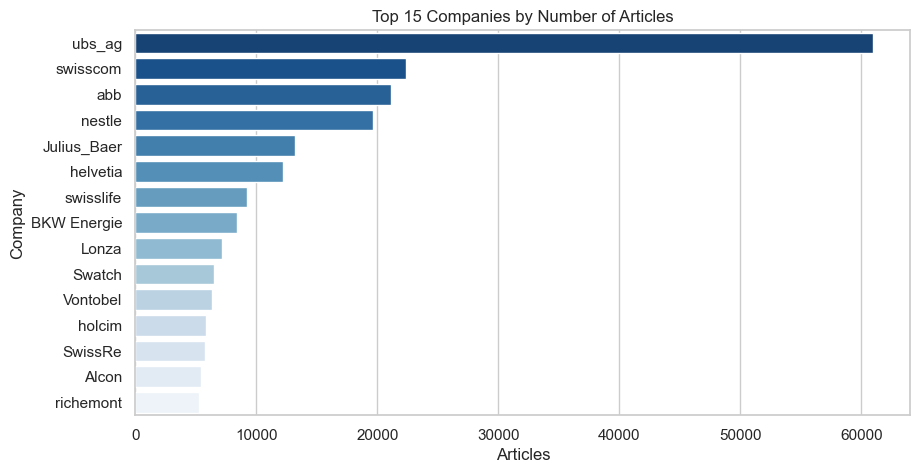

In [47]:
top_companies = df['company'].value_counts().head(15)
sns.barplot(x=top_companies.values, y=top_companies.index, palette="Blues_r")
plt.title("Top 15 Companies by Number of Articles")
plt.xlabel("Articles")
plt.ylabel("Company")
plt.savefig("../../figures/news_exploration/top_companies_by_articles.png")
plt.show()

## 2. Source / Medium Coverage 
### Which outlets dominate?

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\2595291087.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_media.values, y=top_media.index, palette="Greens_r")


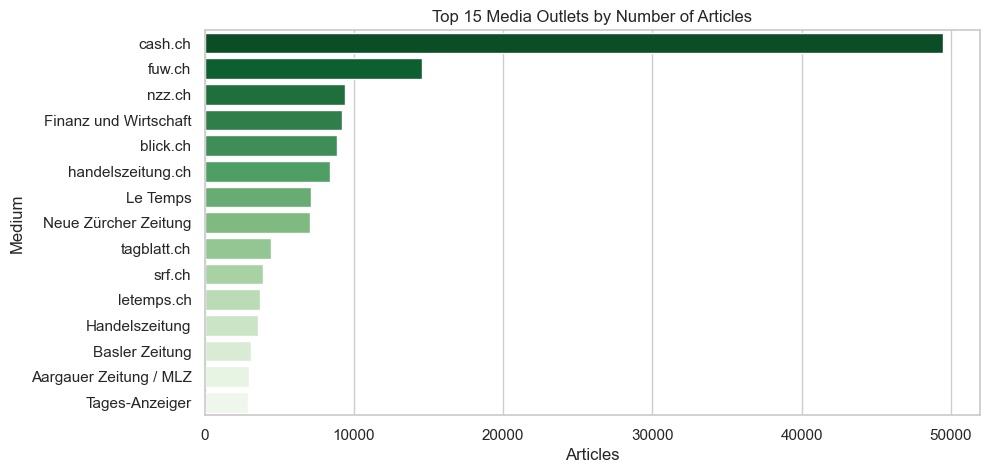

In [48]:
top_media = df['medium_name'].value_counts().head(15)
sns.barplot(x=top_media.values, y=top_media.index, palette="Greens_r")
plt.title("Top 15 Media Outlets by Number of Articles")
plt.xlabel("Articles")
plt.ylabel("Medium")
plt.savefig("../../figures/news_exploration/top_media_by_articles.png")
plt.show()


## 3. Temporal Coverage

### How are articles distributed over time?

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\2551564760.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['pubtime'].dt.to_period('M')


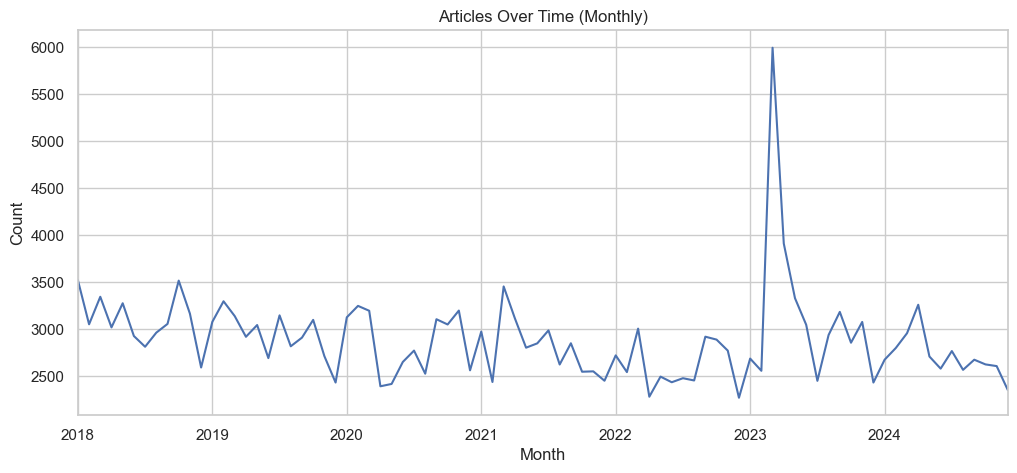

In [49]:
df['year_month'] = df['pubtime'].dt.to_period('M')
monthly_counts = df.groupby('year_month').size()
monthly_counts.plot(kind='line', figsize=(12,5))
plt.title("Articles Over Time (Monthly)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.savefig("../../figures/news_exploration/articles_over_time.png")
plt.show()


## 4. Text Length Distribution

### Are there consistent article sizes?

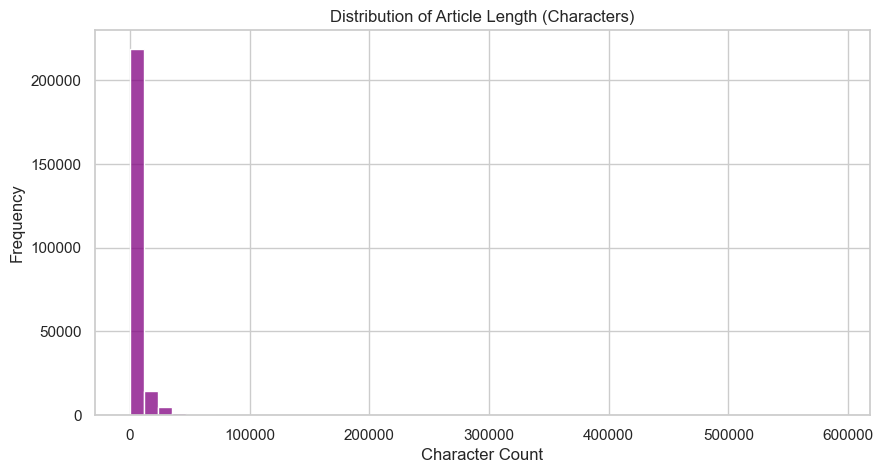

In [50]:
sns.histplot(df['char_count'], bins=50, color='purple')
plt.title("Distribution of Article Length (Characters)")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.savefig("../../figures/news_exploration/article_length_distribution.png")
plt.show()


## 5. Sample Inspection

### Check data quality manually

In [51]:
df.sample(5)[['company', 'medium_name', 'pubtime', 'head_clean', 'content_clean']]


,company,medium_name,pubtime,head_clean,content_clean
97948,nestle,fuw.ch,2020-07-10 17:13:05+00:00,Bei der Hautfarbe hört die Diversity auf,Ethnische Diversität ist in den Schweizer Verw...
161,abb,Handelszeitung,2018-10-17 22:00:00+00:00,«Zürich ist sehr wichtig für die Cloud»,"Urs Hölzle Der Ur-Googler sagt, wie die Cloud-..."
123148,richemont,cash.ch,2021-07-16 04:30:00+00:00,Tagesvorschau International,"Wirtschafts- und Finanztermine am Freitag, den..."
103024,nestle,srf.ch,2021-04-02 09:29:00+00:00,Ein Schritt in Richtung nachhaltige Schoggi,Ein Thema wird in der Diskussion um nachhaltig...
8875,abb,cash.ch,2021-08-11 07:08:00+00:00,+++Börsen-Ticker+++ - Der SMI kennt kein Halte...,Der Swiss Market Index erreicht nach dem Hande...


## 6. Language Distribution by Company


<Figure size 1000x1200 with 0 Axes>

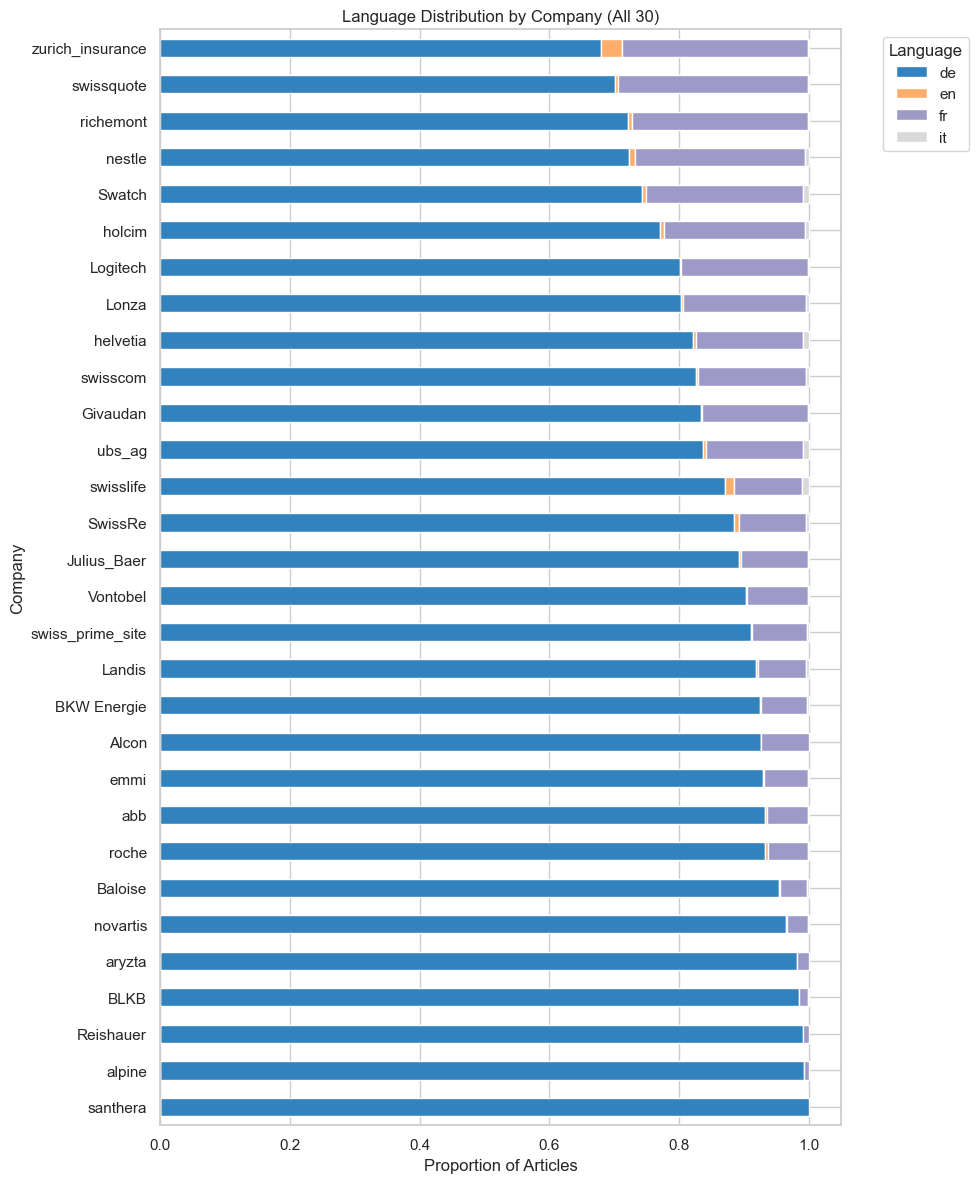

In [52]:
# 1. Aggregate language counts per company
lang_by_company = (
    df.groupby(["company", "language"])
      .size()
      .reset_index(name="count")
)

# 2. Normalize to get proportions (within each company)
lang_by_company["proportion"] = (
    lang_by_company.groupby("company")["count"]
                   .transform(lambda x: x / x.sum())
)

# 3. Pivot to a matrix (companies x languages)
lang_matrix = lang_by_company.pivot(
    index="company", columns="language", values="proportion"
).fillna(0)

# 4. Sort by German proportion (for clearer visualization)
lang_matrix = lang_matrix.sort_values(by="de", ascending=False)

# 5. Plot as a stacked horizontal bar chart
plt.figure(figsize=(10, 12))
lang_matrix.plot(kind="barh", stacked=True, colormap="tab20c", figsize=(10, 12))
plt.title("Language Distribution by Company (All 30)")
plt.xlabel("Proportion of Articles")
plt.ylabel("Company")
plt.legend(title="Language", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("../../figures/news_exploration/language_distribution_by_company.png")
plt.show()


## 7. Language Frequency Over Time by Company
### How frequently do different languages appear over time for each company?

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\1390082050.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


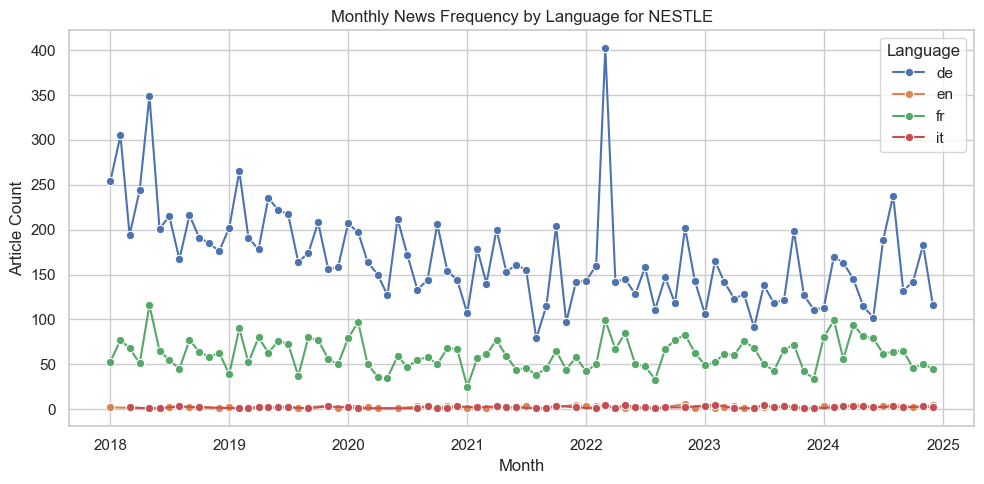

In [53]:
# Choose one company to inspect (e.g. Nestlé)
company_name = "nestle"

# Filter for that company
subset = df[df['company'] == company_name].copy()

# Convert pubtime to monthly period
subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()

# Group by month and language
monthly_lang = subset.groupby(['month', 'language']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_lang, x='month', y='count', hue='language', marker='o')
plt.title(f"Monthly News Frequency by Language for {company_name.upper()}")
plt.xlabel("Month")
plt.ylabel("Article Count")
plt.legend(title="Language")
plt.tight_layout()
plt.savefig("../../figures/news_exploration/monthly_news_frequency_by_language.png")
plt.show()


C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


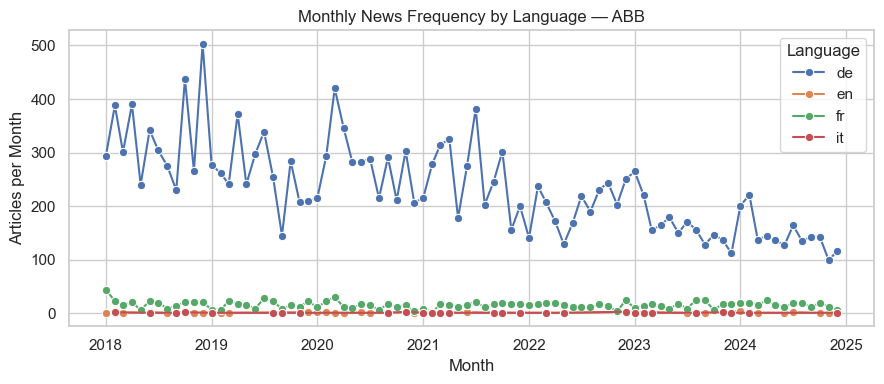

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


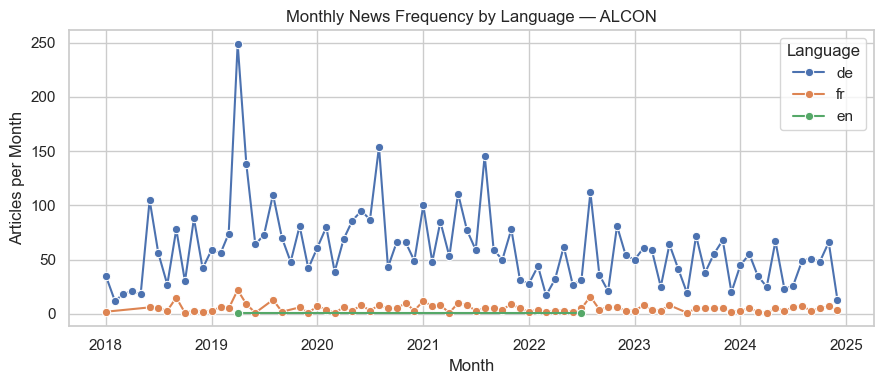

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


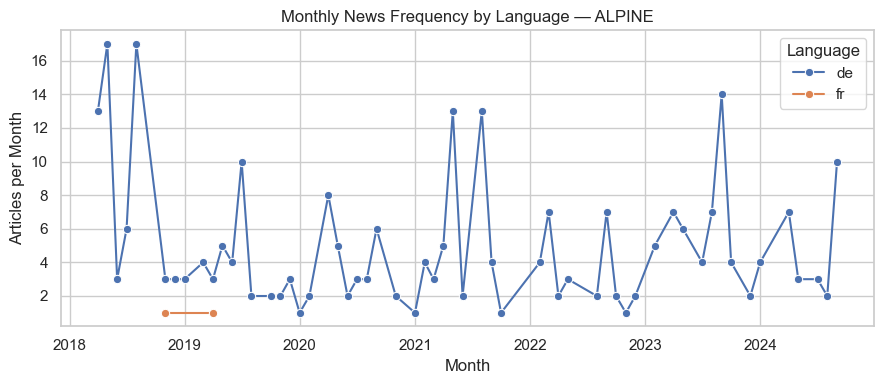

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


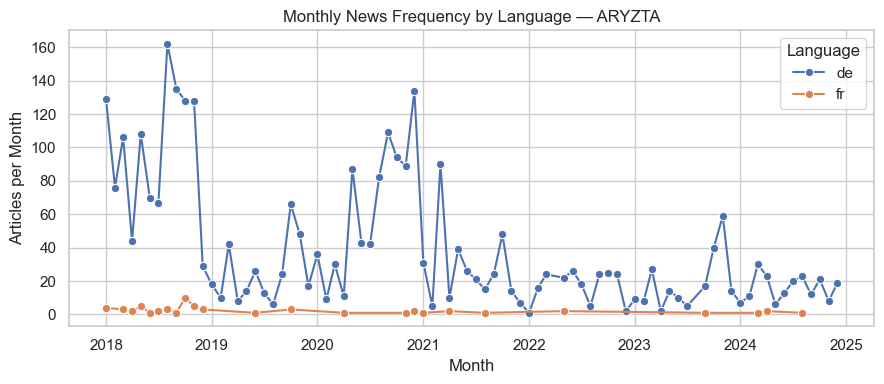

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


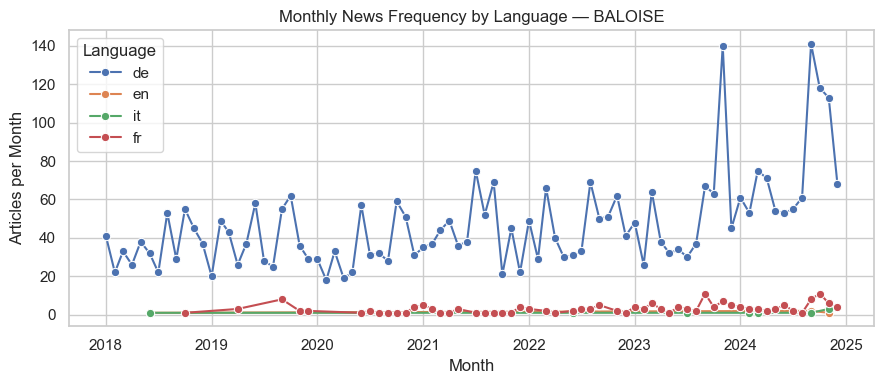

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


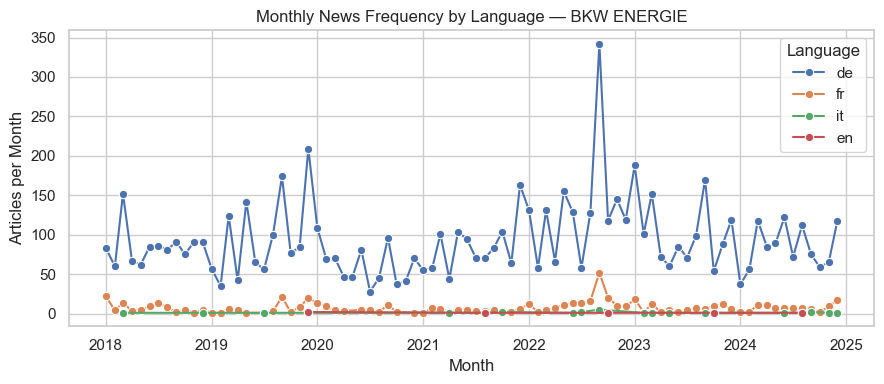

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


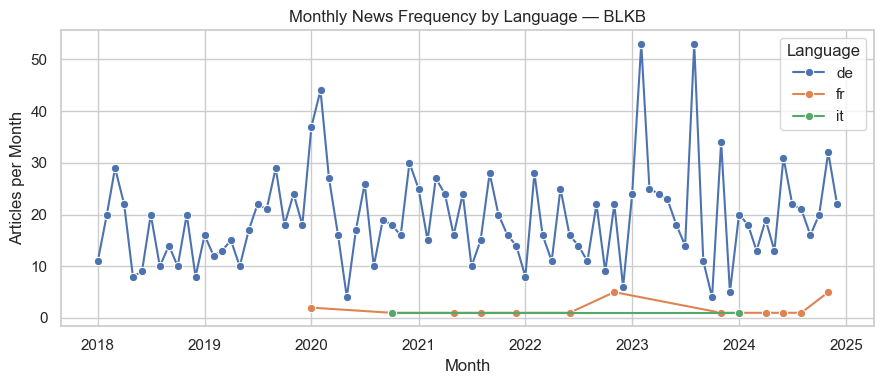

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


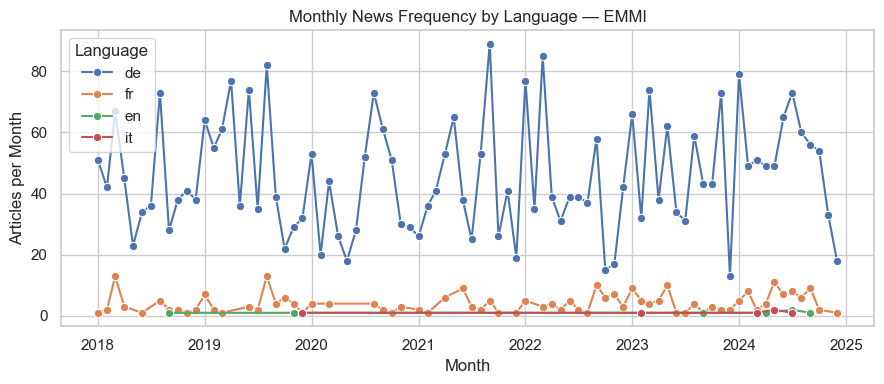

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


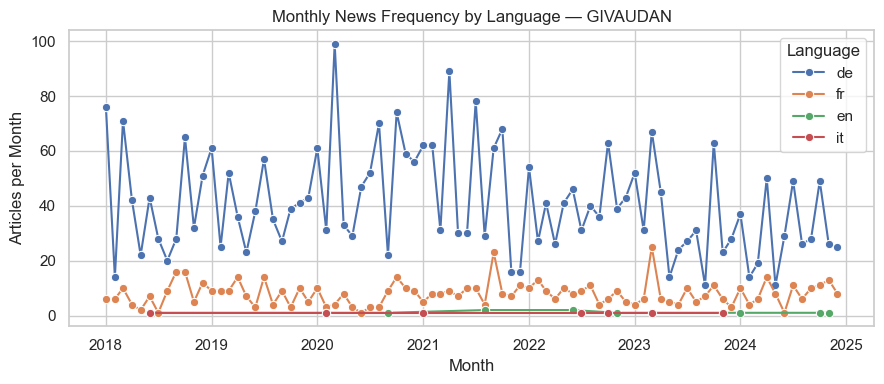

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


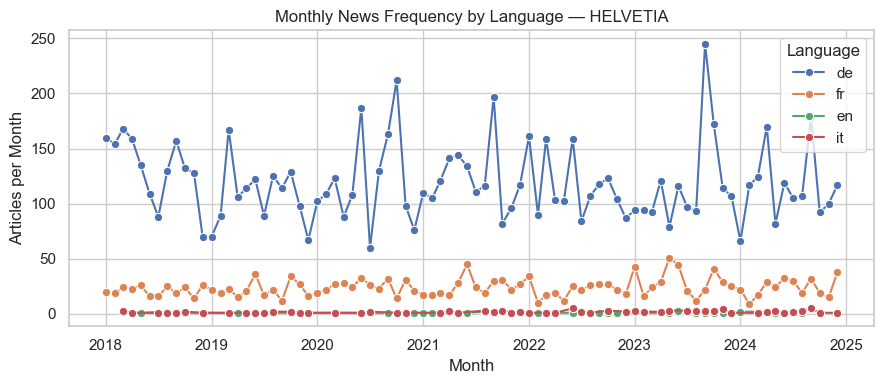

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


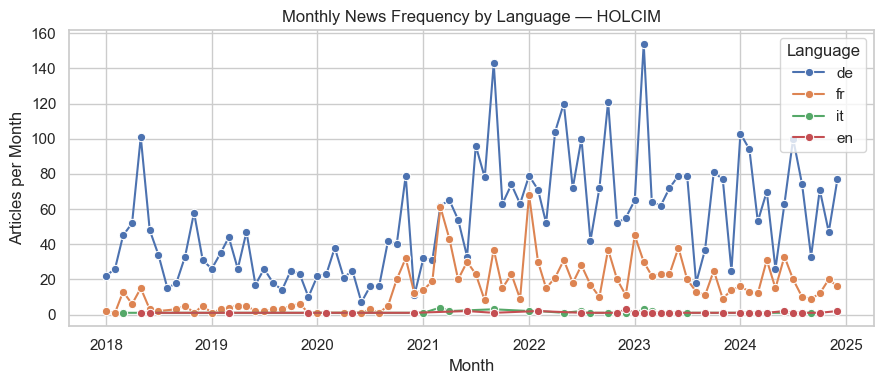

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


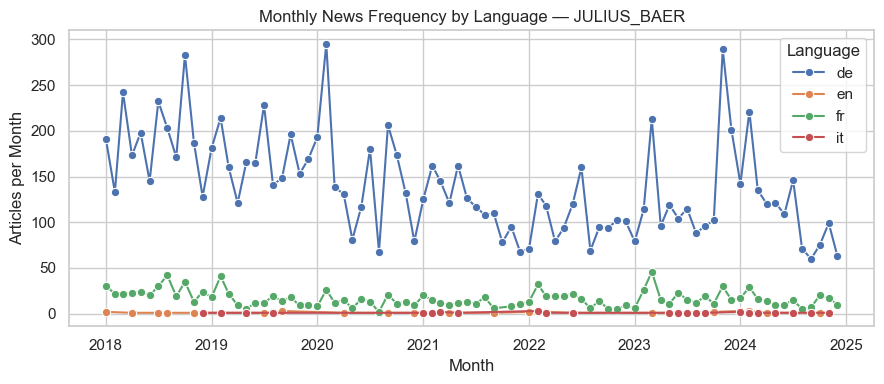

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


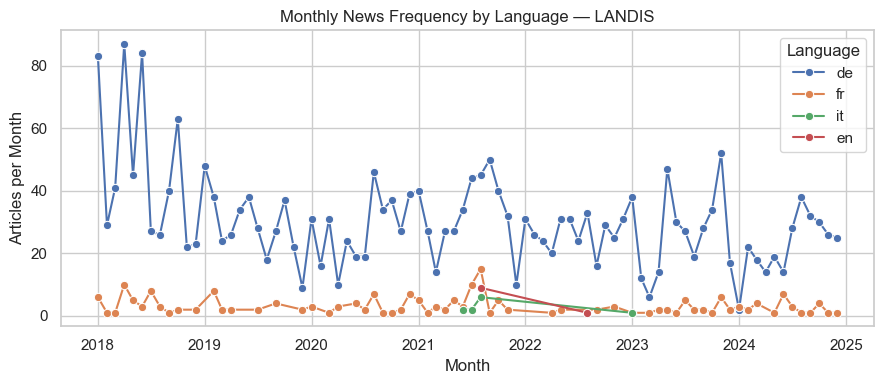

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


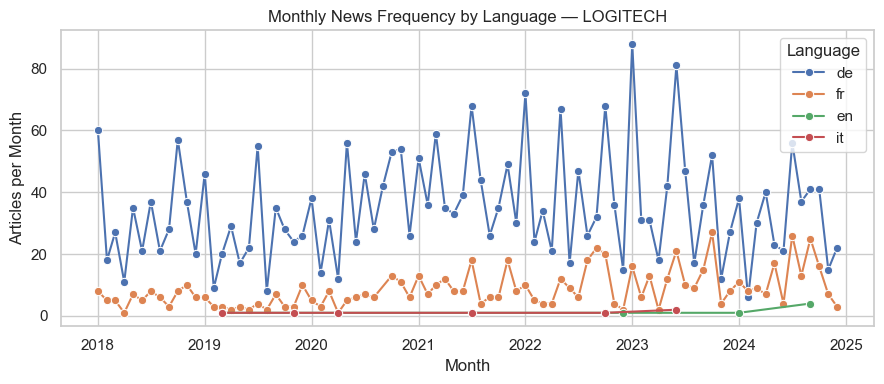

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


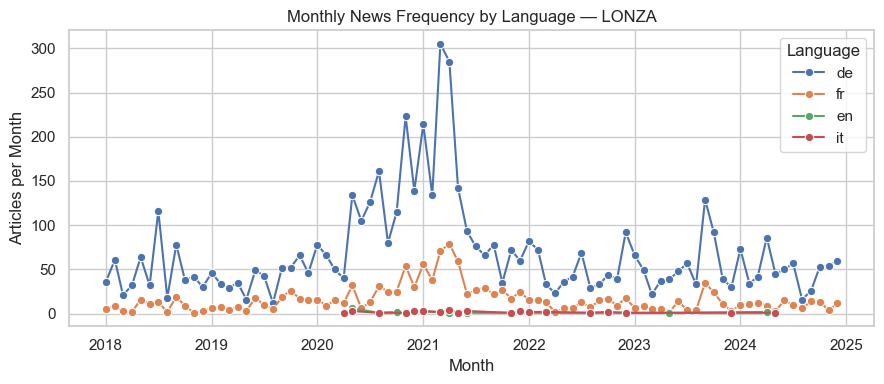

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


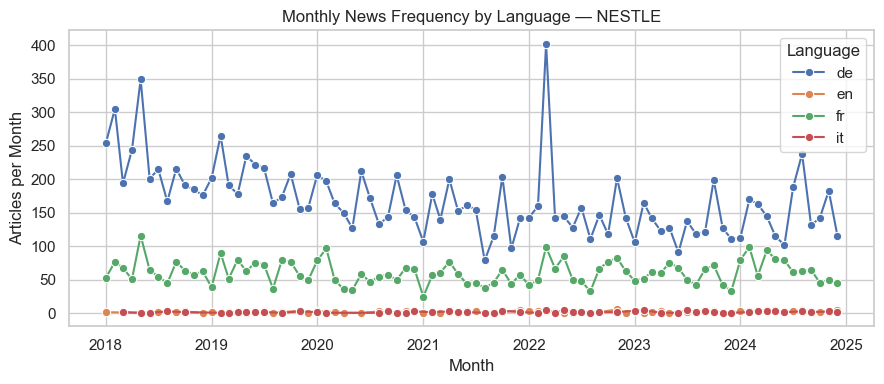

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


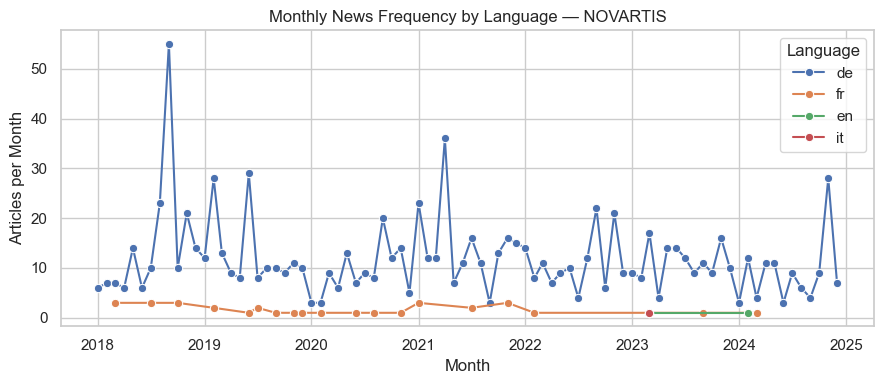

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


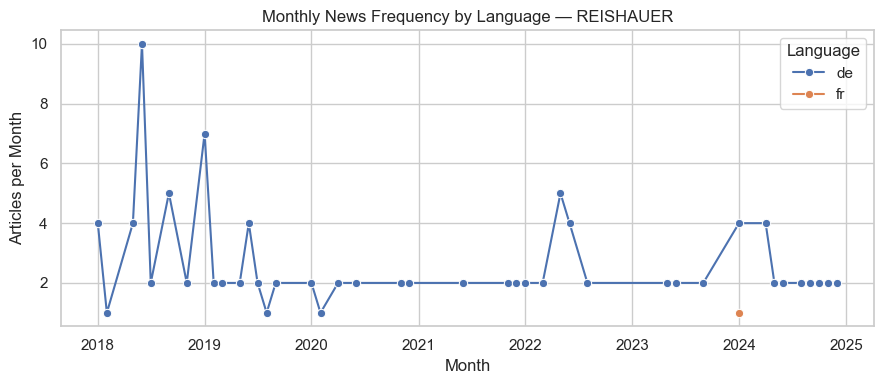

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


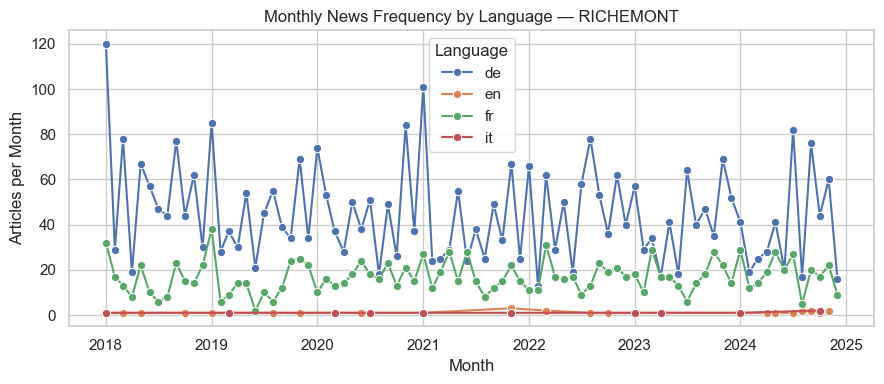

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


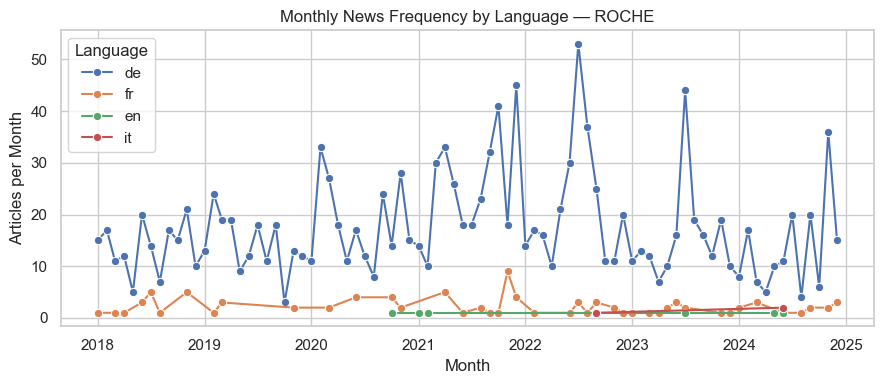

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


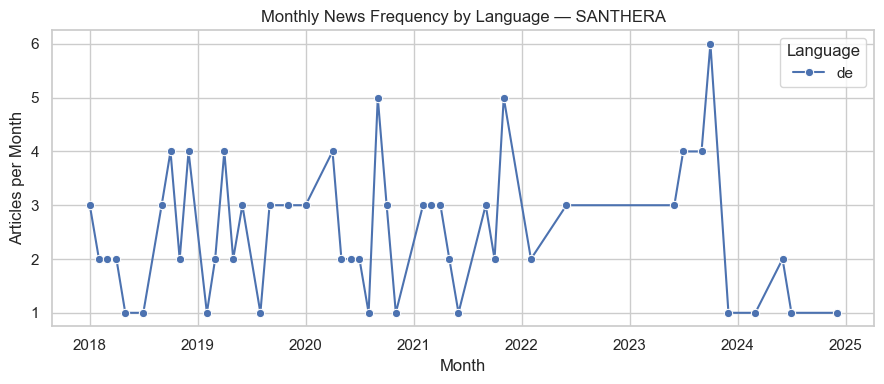

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


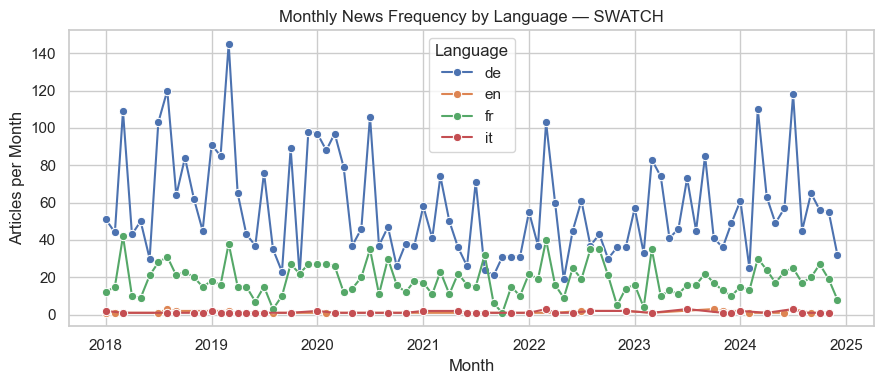

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


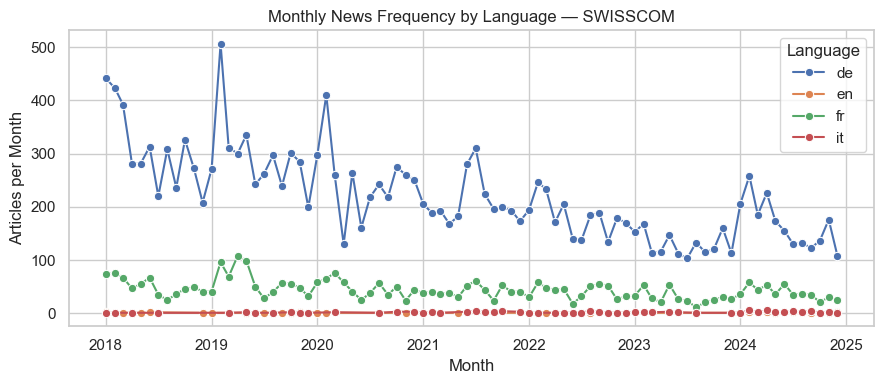

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


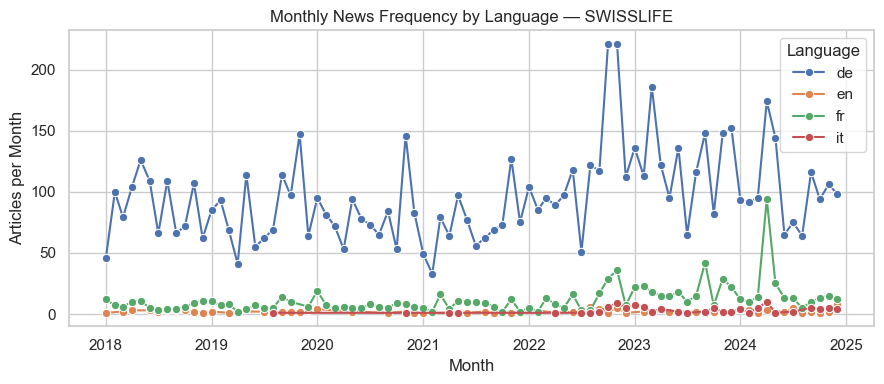

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


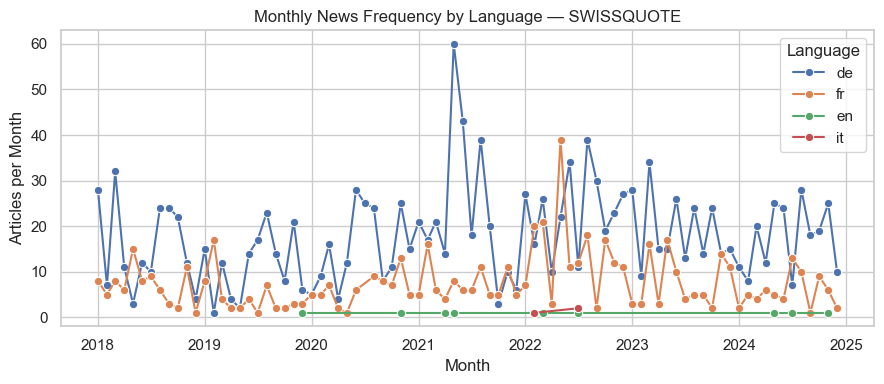

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


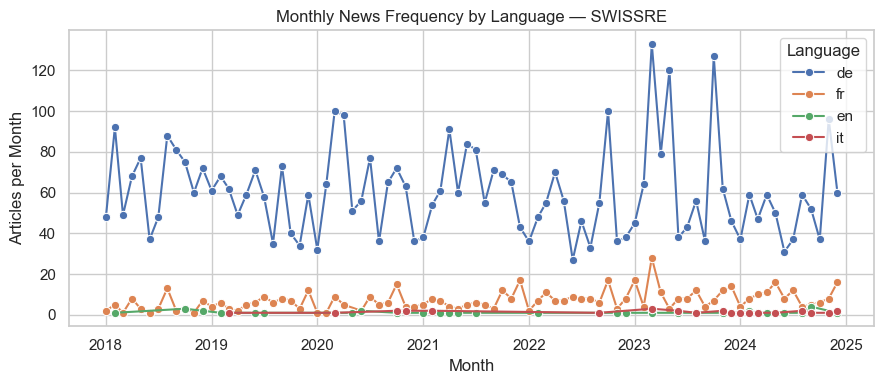

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


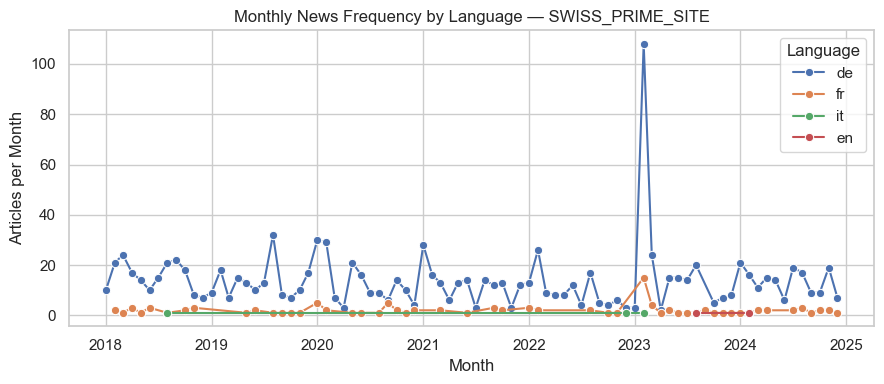

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


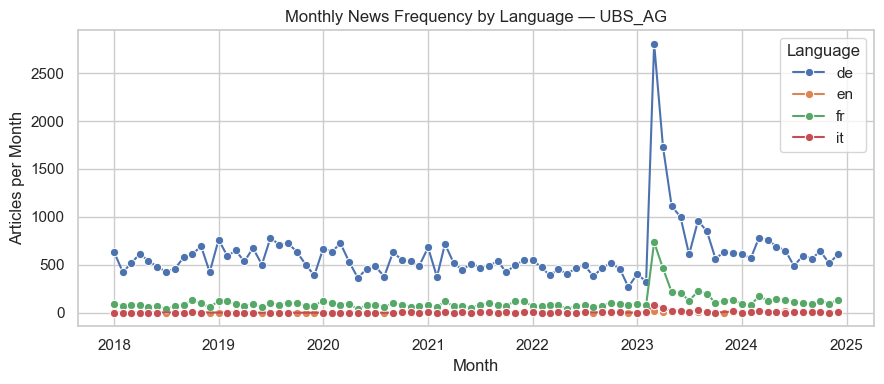

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


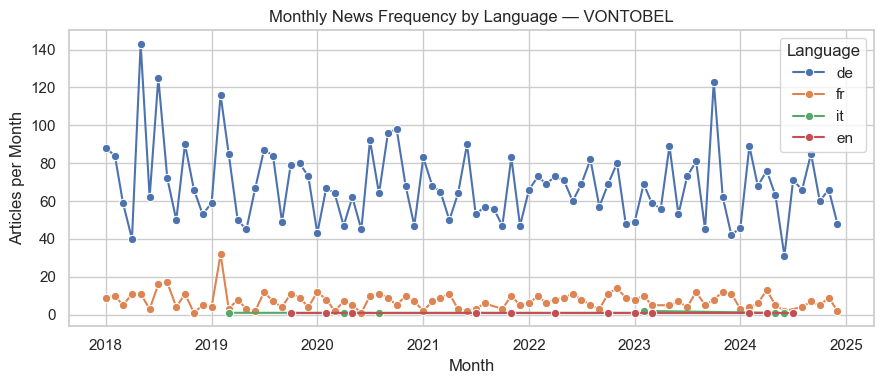

C:\Users\mkcak\AppData\Local\Temp\ipykernel_27756\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


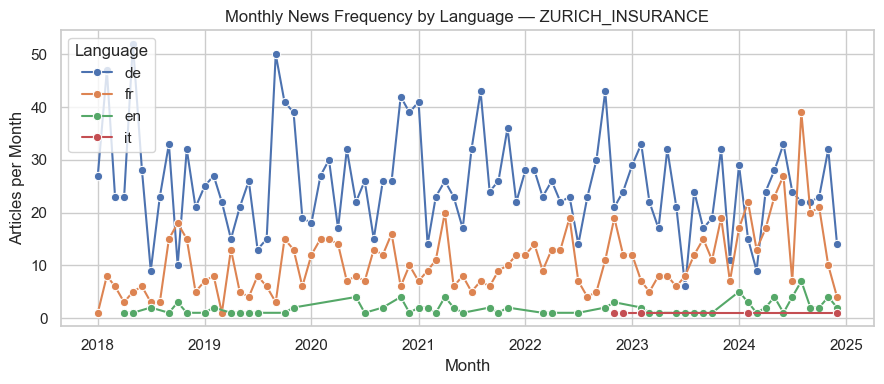

In [54]:
companies = df['company'].unique()

for comp in companies:
    subset = df[df['company'] == comp].copy()
    subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()
    monthly_lang = subset.groupby(['month', 'language']).size().reset_index(name='count')

    plt.figure(figsize=(9,4))
    sns.lineplot(data=monthly_lang, x='month', y='count', hue='language', marker='o')
    plt.title(f"Monthly News Frequency by Language — {comp.upper()}")
    plt.xlabel("Month")
    plt.ylabel("Articles per Month")
    plt.legend(title="Language")
    plt.tight_layout()
    plt.savefig(f"../../figures/news_exploration/monthly_news_frequency_by_language_{comp}.png")
    plt.show()


In [55]:
# Ensure 'pubtime' is datetime
df['pubtime'] = pd.to_datetime(df['pubtime'])

# Extract year from pubtime
df['year'] = df['pubtime'].dt.year

# Group by company, year, language
lang_year = (
    df.groupby(['company', 'year', 'language'])
      .size()
      .reset_index(name='count')
)


In [56]:
lang_year['proportion'] = (
    lang_year.groupby(['company', 'year'])['count']
             .transform(lambda x: x / x.sum())
)


In [57]:
# Create pivot: rows = company, columns = year, values = proportion of 'de'
lang = 'de'
pivot = lang_year[lang_year['language'] == lang].pivot(
    index='company', columns='year', values='proportion'
).fillna(0)


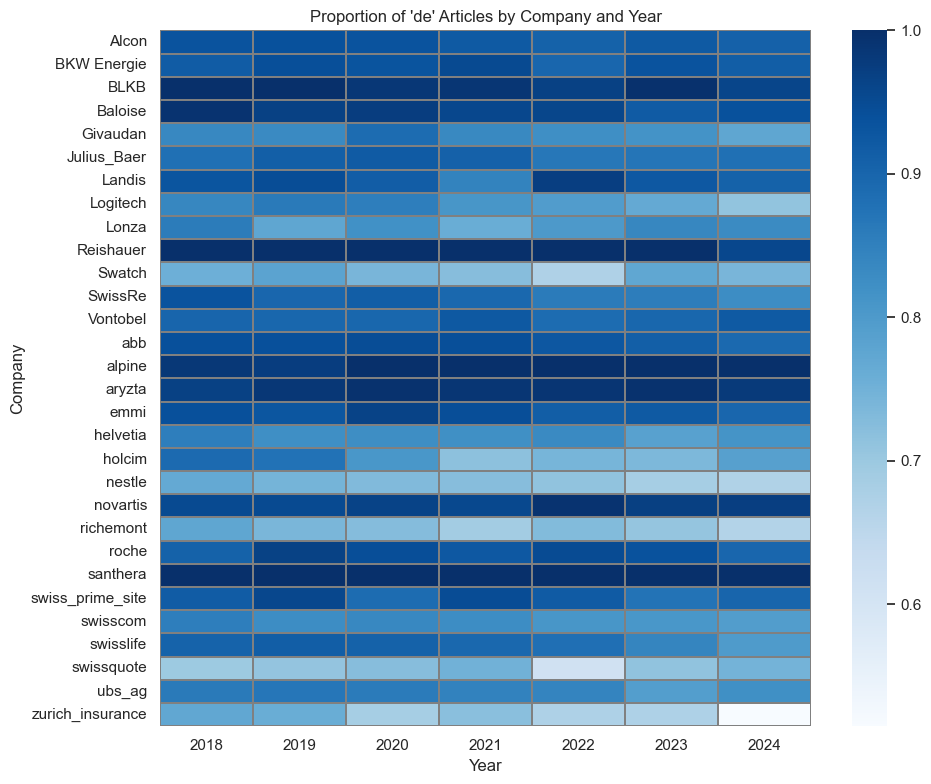

In [58]:
plt.figure(figsize=(10,8))
sns.heatmap(pivot, cmap='Blues', linewidths=0.3, linecolor='gray')
plt.title(f"Proportion of '{lang}' Articles by Company and Year")
plt.xlabel("Year")
plt.ylabel("Company")
plt.tight_layout()
plt.show()


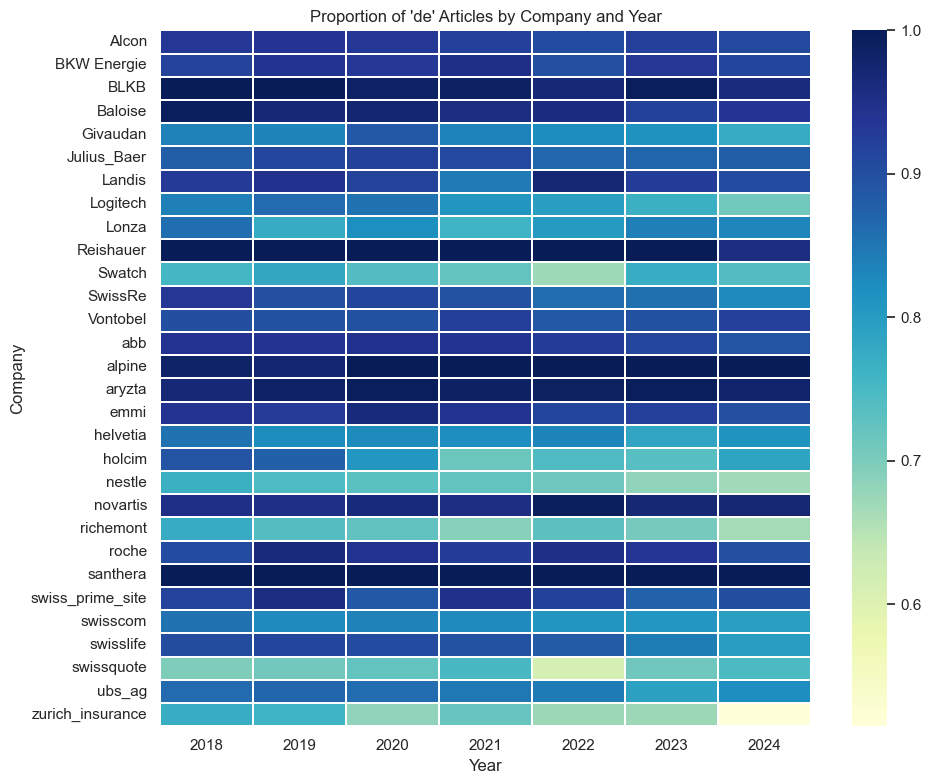

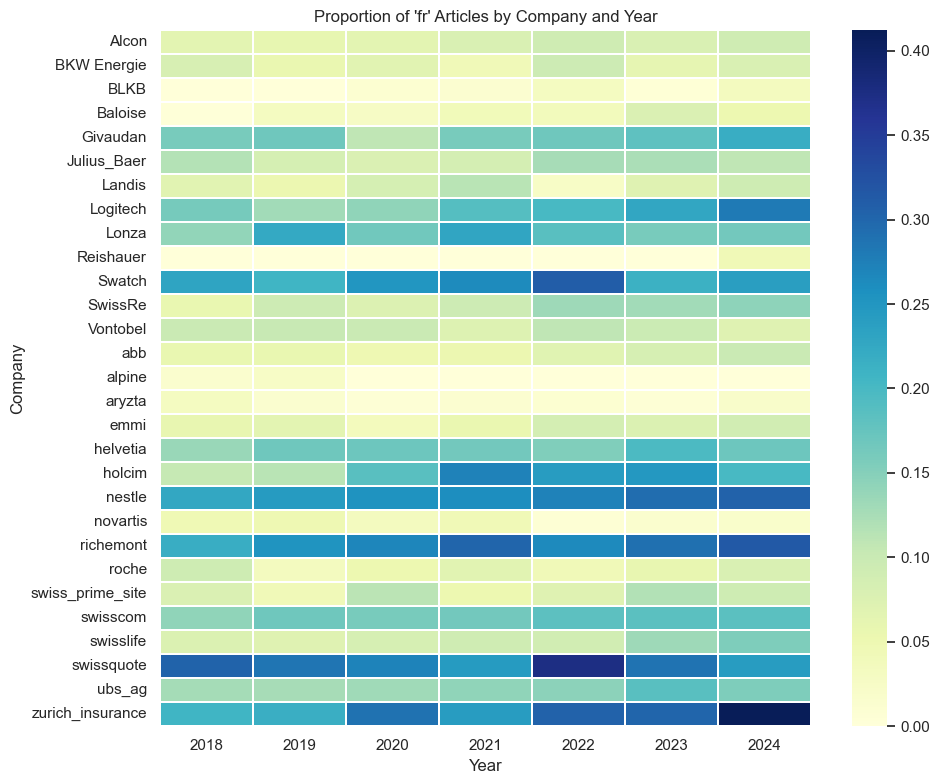

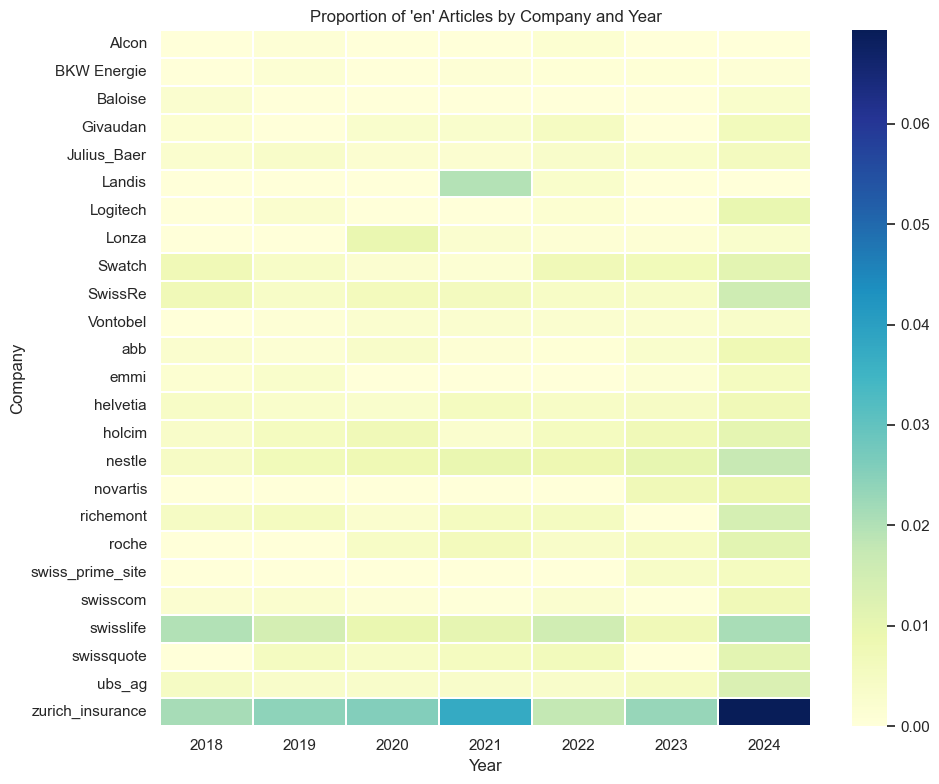

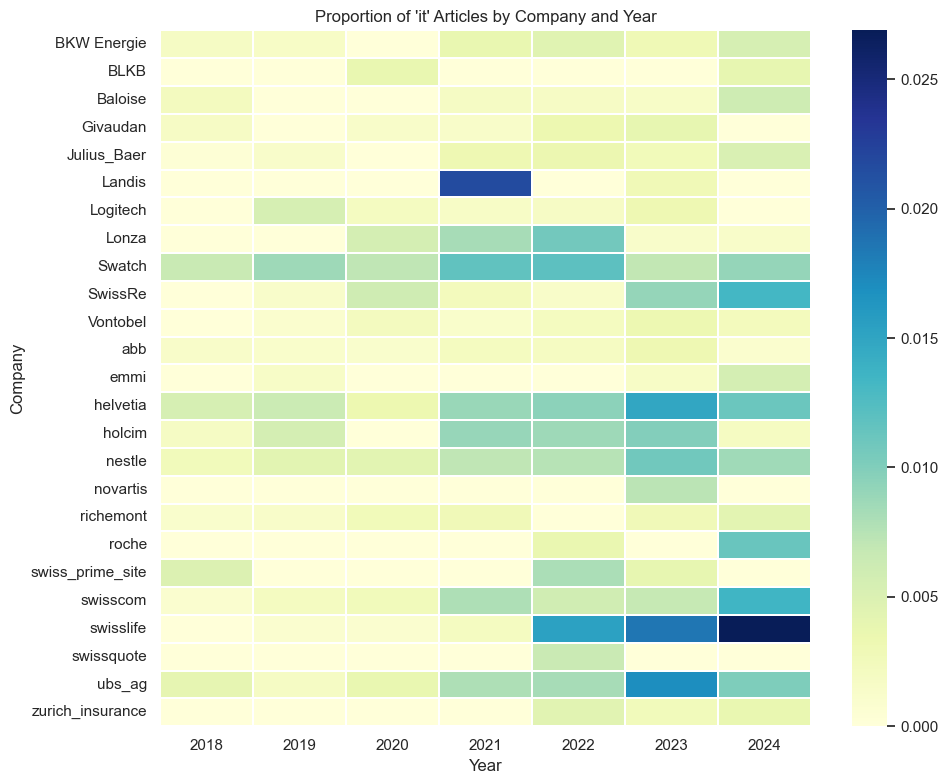

In [59]:
for lang in ['de', 'fr', 'en', 'it']:
    pivot = lang_year[lang_year['language'] == lang].pivot(
        index='company', columns='year', values='proportion'
    ).fillna(0)
    plt.figure(figsize=(10,8))
    sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.3)
    plt.title(f"Proportion of '{lang}' Articles by Company and Year")
    plt.xlabel("Year")
    plt.ylabel("Company")
    plt.tight_layout()
    plt.show()


In [60]:
## Finish